In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
x = np.array([i for i in range(10)])


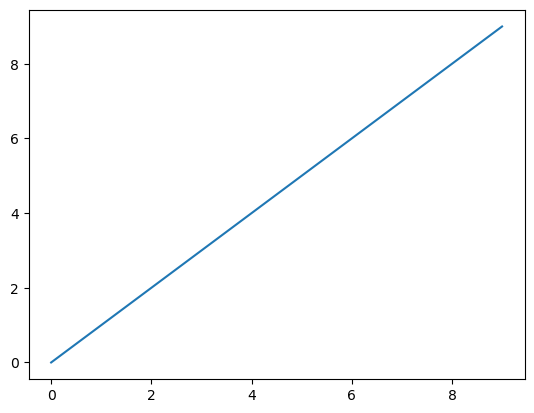

In [8]:
# que relacion tiene el plot
plt.plot(x,x)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
np.set_printoptions(precision=5, suppress=True)

In [15]:
from numba import njit

In [22]:
@njit
def construct_circulant(row : np.array):

    N = row.size

    C = np.empty((N,N))

    for i in range(N):

        C[i,i:] = row[:N-i]
        C[i,:i] = row[N-i:]
    return C


In [37]:
C = construct_circulant(x)
C

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [9., 0., 1., 2., 3., 4., 5., 6., 7., 8.],
       [8., 9., 0., 1., 2., 3., 4., 5., 6., 7.],
       [7., 8., 9., 0., 1., 2., 3., 4., 5., 6.],
       [6., 7., 8., 9., 0., 1., 2., 3., 4., 5.],
       [5., 6., 7., 8., 9., 0., 1., 2., 3., 4.],
       [4., 5., 6., 7., 8., 9., 0., 1., 2., 3.],
       [3., 4., 5., 6., 7., 8., 9., 0., 1., 2.],
       [2., 3., 4., 5., 6., 7., 8., 9., 0., 1.],
       [1., 2., 3., 4., 5., 6., 7., 8., 9., 0.]])

### regla conmutatividad

In [26]:
A = construct_circulant(np.array([i for i in range(2,10+2)]))
A

array([[ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       [11.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [10., 11.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 9., 10., 11.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 8.,  9., 10., 11.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 7.,  8.,  9., 10., 11.,  2.,  3.,  4.,  5.,  6.],
       [ 6.,  7.,  8.,  9., 10., 11.,  2.,  3.,  4.,  5.],
       [ 5.,  6.,  7.,  8.,  9., 10., 11.,  2.,  3.,  4.],
       [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  2.,  3.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  2.]])

In [27]:
# conmutatividad
A * C

array([[ 0.,  3.,  8., 15., 24., 35., 48., 63., 80., 99.],
       [99.,  0.,  3.,  8., 15., 24., 35., 48., 63., 80.],
       [80., 99.,  0.,  3.,  8., 15., 24., 35., 48., 63.],
       [63., 80., 99.,  0.,  3.,  8., 15., 24., 35., 48.],
       [48., 63., 80., 99.,  0.,  3.,  8., 15., 24., 35.],
       [35., 48., 63., 80., 99.,  0.,  3.,  8., 15., 24.],
       [24., 35., 48., 63., 80., 99.,  0.,  3.,  8., 15.],
       [15., 24., 35., 48., 63., 80., 99.,  0.,  3.,  8.],
       [ 8., 15., 24., 35., 48., 63., 80., 99.,  0.,  3.],
       [ 3.,  8., 15., 24., 35., 48., 63., 80., 99.,  0.]])

In [28]:
C * A

array([[ 0.,  3.,  8., 15., 24., 35., 48., 63., 80., 99.],
       [99.,  0.,  3.,  8., 15., 24., 35., 48., 63., 80.],
       [80., 99.,  0.,  3.,  8., 15., 24., 35., 48., 63.],
       [63., 80., 99.,  0.,  3.,  8., 15., 24., 35., 48.],
       [48., 63., 80., 99.,  0.,  3.,  8., 15., 24., 35.],
       [35., 48., 63., 80., 99.,  0.,  3.,  8., 15., 24.],
       [24., 35., 48., 63., 80., 99.,  0.,  3.,  8., 15.],
       [15., 24., 35., 48., 63., 80., 99.,  0.,  3.,  8.],
       [ 8., 15., 24., 35., 48., 63., 80., 99.,  0.,  3.],
       [ 3.,  8., 15., 24., 35., 48., 63., 80., 99.,  0.]])

In [32]:
(A * C == C * A)
    

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [33]:
np.all((A * C == C * A))
# conmutatividad comprobada

True

In [38]:
np.transpose(A)

array([[ 2., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.],
       [ 3.,  2., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.],
       [ 4.,  3.,  2., 11., 10.,  9.,  8.,  7.,  6.,  5.],
       [ 5.,  4.,  3.,  2., 11., 10.,  9.,  8.,  7.,  6.],
       [ 6.,  5.,  4.,  3.,  2., 11., 10.,  9.,  8.,  7.],
       [ 7.,  6.,  5.,  4.,  3.,  2., 11., 10.,  9.,  8.],
       [ 8.,  7.,  6.,  5.,  4.,  3.,  2., 11., 10.,  9.],
       [ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2., 11., 10.],
       [10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2., 11.],
       [11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.]])

In [35]:
A

array([[ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       [11.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [10., 11.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 9., 10., 11.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 8.,  9., 10., 11.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 7.,  8.,  9., 10., 11.,  2.,  3.,  4.,  5.,  6.],
       [ 6.,  7.,  8.,  9., 10., 11.,  2.,  3.,  4.,  5.],
       [ 5.,  6.,  7.,  8.,  9., 10., 11.,  2.,  3.,  4.],
       [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  2.,  3.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  2.]])

# scipy

In [47]:
sc.init_printing(use_latex='mathjax')

In [48]:
from IPython.display import display
display(C)

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [9., 0., 1., 2., 3., 4., 5., 6., 7., 8.],
       [8., 9., 0., 1., 2., 3., 4., 5., 6., 7.],
       [7., 8., 9., 0., 1., 2., 3., 4., 5., 6.],
       [6., 7., 8., 9., 0., 1., 2., 3., 4., 5.],
       [5., 6., 7., 8., 9., 0., 1., 2., 3., 4.],
       [4., 5., 6., 7., 8., 9., 0., 1., 2., 3.],
       [3., 4., 5., 6., 7., 8., 9., 0., 1., 2.],
       [2., 3., 4., 5., 6., 7., 8., 9., 0., 1.],
       [1., 2., 3., 4., 5., 6., 7., 8., 9., 0.]])

In [50]:
#import sympy as sc

sc.pprint(C)

 [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
  [9. 0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [8. 9. 0. 1. 2. 3. 4. 5. 6. 7.]
  [7. 8. 9. 0. 1. 2. 3. 4. 5. 6.]
  [6. 7. 8. 9. 0. 1. 2. 3. 4. 5.]
  [5. 6. 7. 8. 9. 0. 1. 2. 3. 4.]
  [4. 5. 6. 7. 8. 9. 0. 1. 2. 3.]
  [3. 4. 5. 6. 7. 8. 9. 0. 1. 2.]
  [2. 3. 4. 5. 6. 7. 8. 9. 0. 1.]
 [1. 2. 3. 4. 5. 6. 7. 8. 9. 0.]]


# playground

In [ ]:
# que es esto?

from scipy.linalg import solve_circulant, solve, circulant, lstsq
import numpy as np
c = np.array([2,2,4])
b = np.array([1,2,3])
solve_circulant(c,b)